# Exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_csv('../data/training_set.csv')
train_meta = pd.read_csv('../data/training_set_metadata.csv')

In [3]:
# these are pretty big, don't load them locally`
# test_df = pd.read_csv('../data/test_set.csv')
# test_set_meta = pd.read_csv('../data/test_set_metadata.csv')

Let's focus on train_df first. This dataframe contains time series of flux in all of the passbands for all objects:

In [4]:
train_df.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [7]:
print('observations per object:')
print('min:', train_df.groupby('object_id').count()['mjd'].min())
print('max:', train_df.groupby('object_id').count()['mjd'].max())

observations per object:
min: 47
max: 352


There is a good enough number of observations per object, what about observations per 1 passband of 1 object?

In [8]:
groupped_df = train_df.groupby(['object_id', 'passband']).count()
ts_lens = groupped_df.sort_values(by='mjd')

In [9]:
ts_lens.head()

,,mjd,flux,flux_err,detected
object_id,passband,,,,
74256178,0,2,2,2,2
20823075,1,3,3,3,3
64772601,0,3,3,3,3
6660231,0,3,3,3,3
77033002,1,3,3,3,3


In [10]:
ts_lens.tail()

,,mjd,flux,flux_err,detected
object_id,passband,,,,
231741,0,72,72,72,72
231490,0,72,72,72,72
266651,0,72,72,72,72
265676,0,72,72,72,72
204843,0,72,72,72,72


For each objects, we have 6 time series (1 per each passband). Some of them have ridiculously small amount of available data, this is going to be a real problem. The fact that passband readings are taken at different times makes it even harder - the obvious way to format it into multivariable time series will be to interpolate missing values from surrounding ones, but small number of samples in the series will be a challenge.

C:\Users\kkowa\Miniconda3\envs\plasticc\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


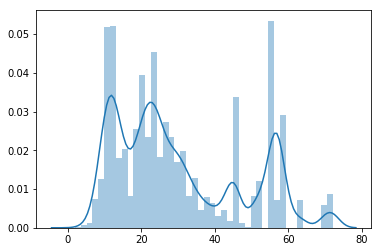

In [11]:
sns.distplot(ts_lens['mjd'].values)

Distribution of time series lengths does not look good at all (NOTE: This is just the training set, need to do further research in the cloud with entire dataset).

C:\Users\kkowa\Miniconda3\envs\plasticc\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kkowa\Miniconda3\envs\plasticc\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


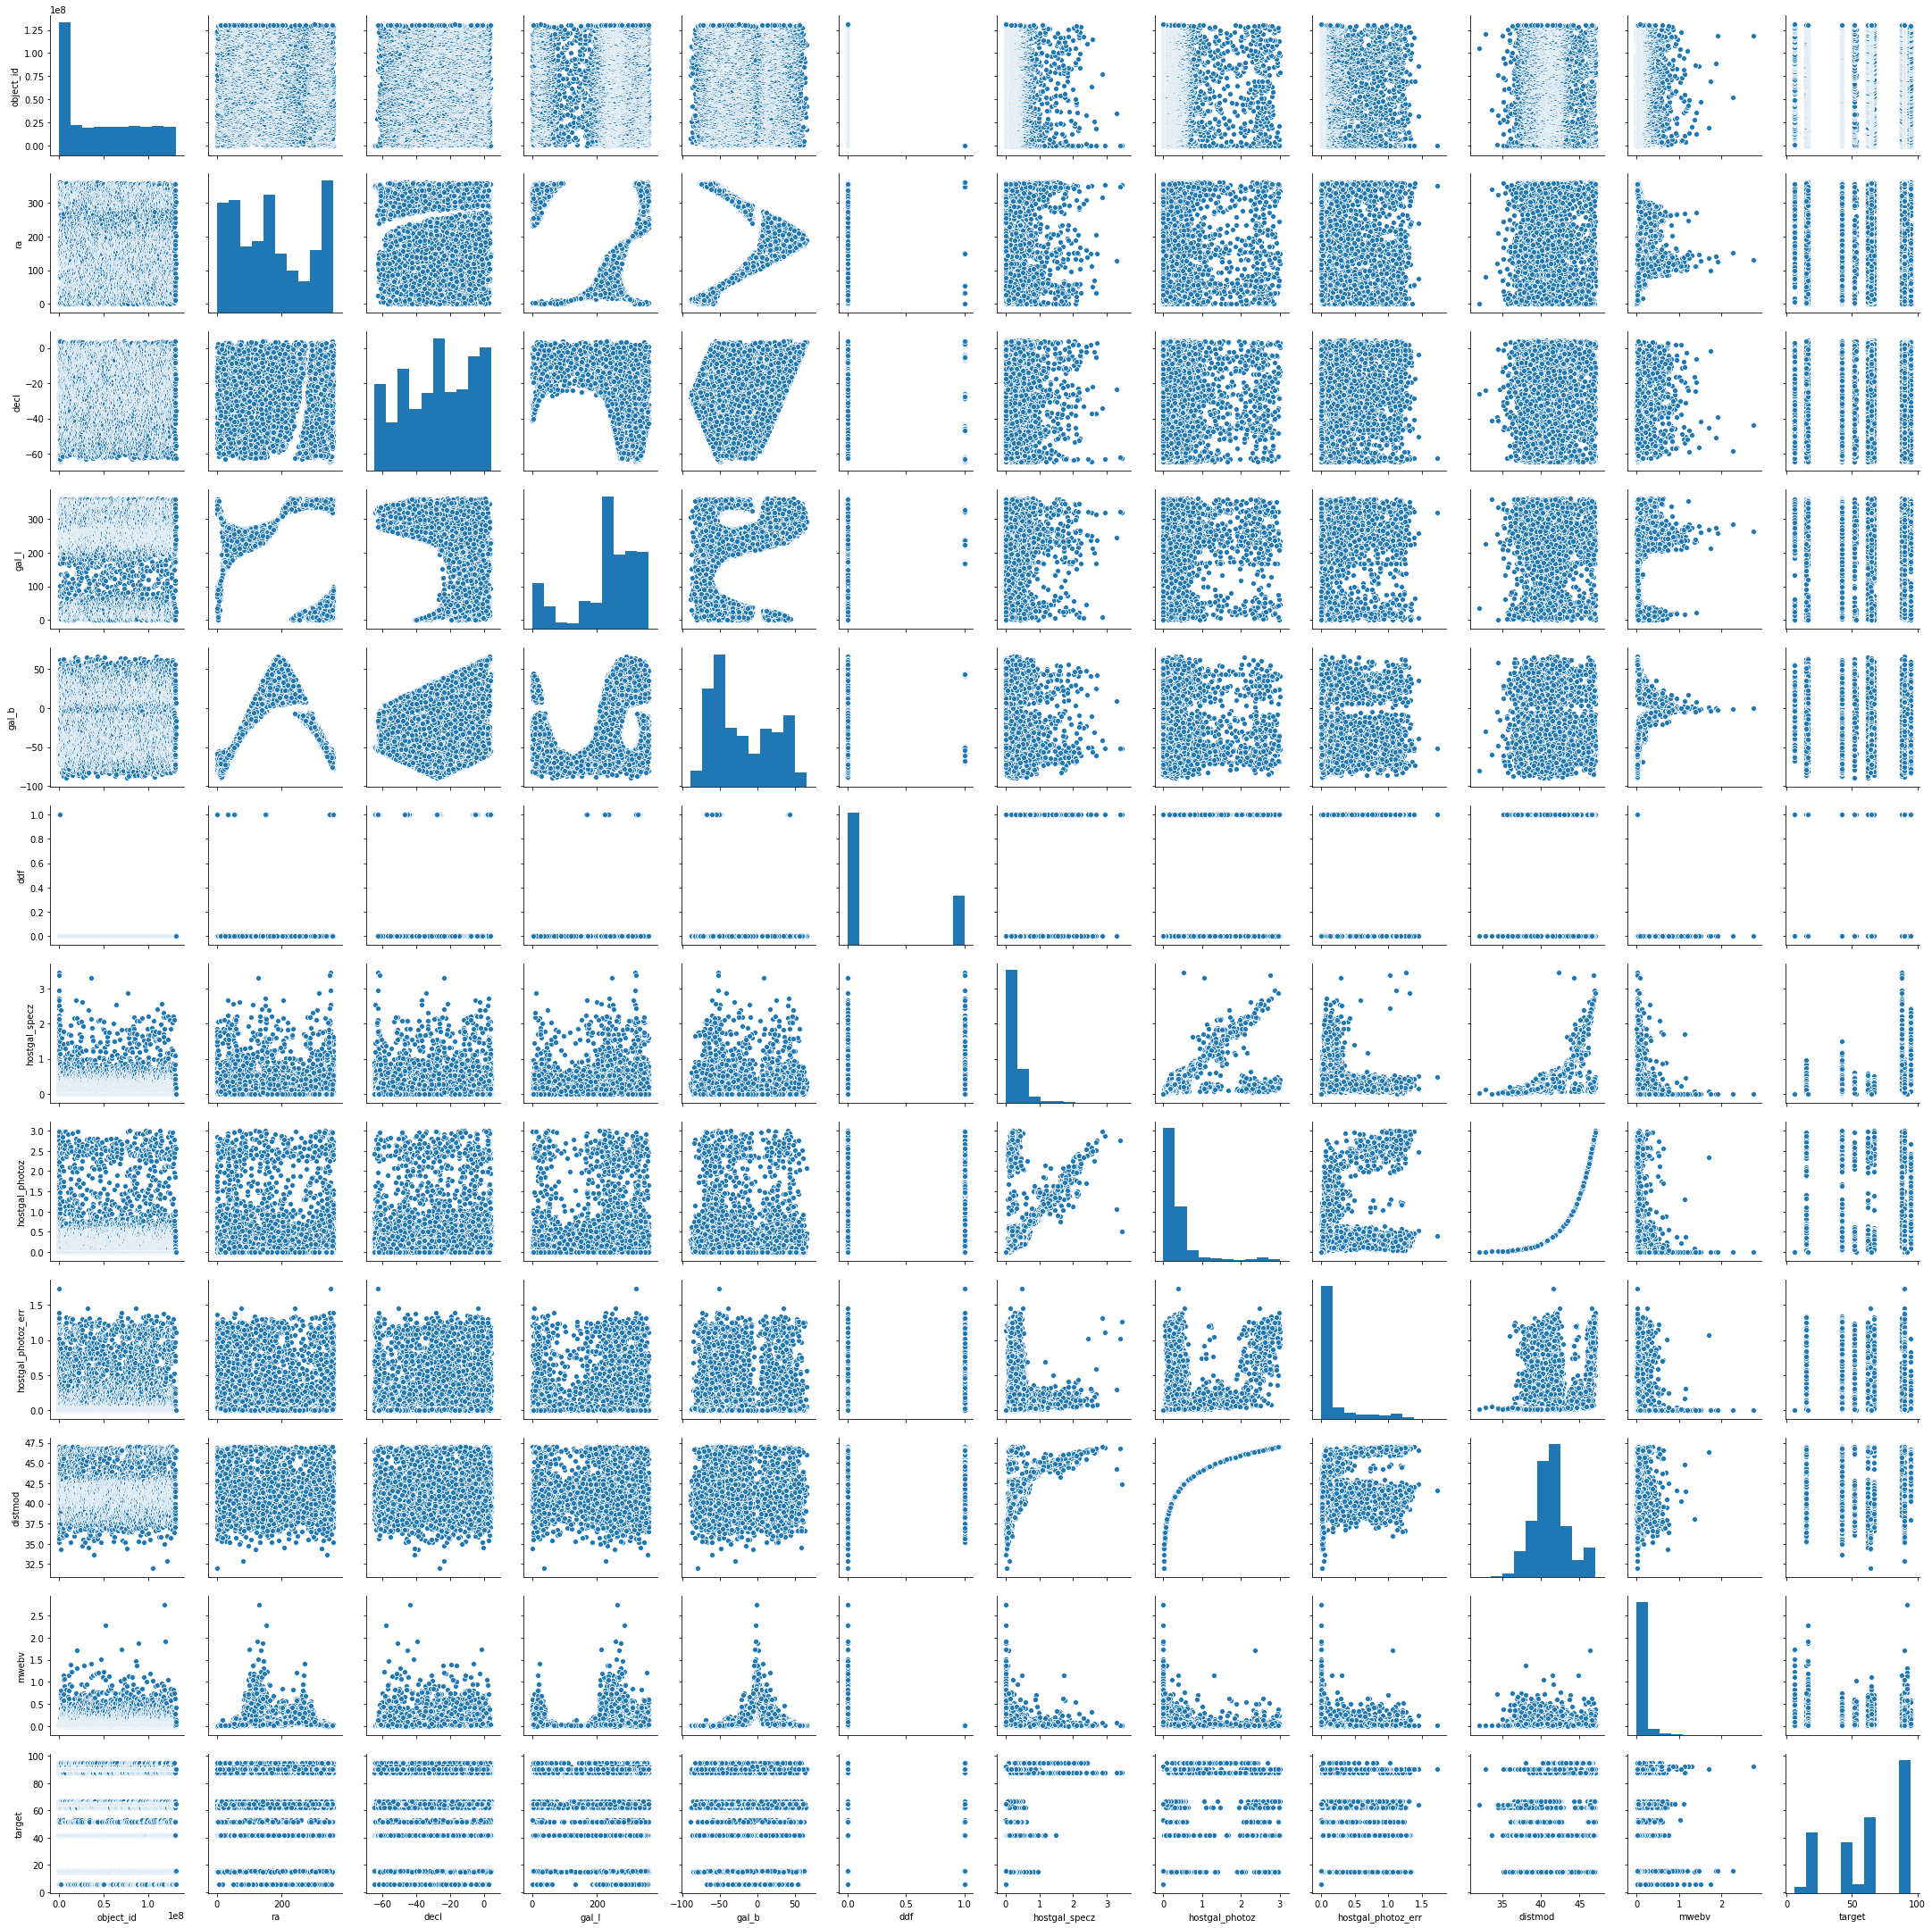

In [13]:
sns.pairplot(train_meta)

In [16]:
!wsl ls -l

total 2884
-rwxrwxrwx 1 kowal kowal 2951452 Oct 24 11:12 Exploratory.ipynb
